In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data/btcusd_1-min_data.csv")
data["Timestamp"] = data["Timestamp"] - min(data["Timestamp"])

In [364]:
data.head()

,Timestamp,Open,High,Low,Close,Volume
0,0.0,4.58,4.58,4.58,4.58,0.0
1,60.0,4.58,4.58,4.58,4.58,0.0
2,120.0,4.58,4.58,4.58,4.58,0.0
3,180.0,4.58,4.58,4.58,4.58,0.0
4,240.0,4.58,4.58,4.58,4.58,0.0


In [365]:
print(len(data))
#data_sub = data[-980000:-960000]
data_sub = data[-990000:-900000]

7268797


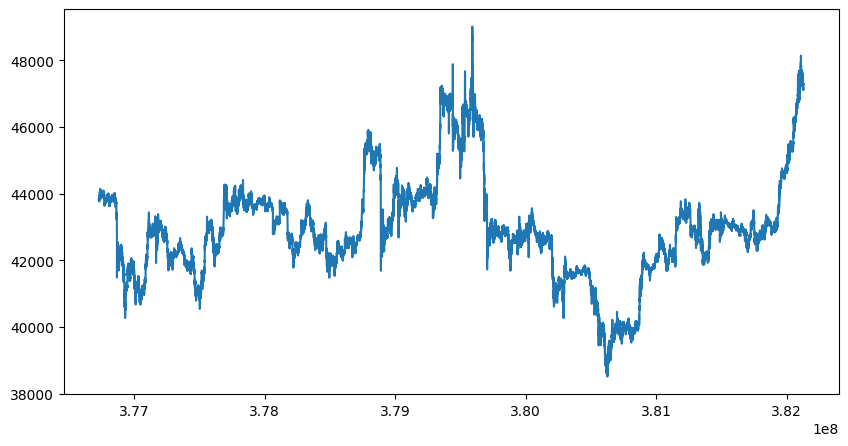

In [366]:
plt.figure(figsize=(10,5))
plt.plot(data_sub["Timestamp"], data_sub["Open"])

In [367]:
money = 0.0
coins = 1.0

alpha_up = 0.001
alpha_low = 0.00001

last_deal_price = data_sub["Open"].iloc[0]
wealth = coins*last_deal_price
times = []
wealths = []

for index, row in data_sub.iterrows():
    if row["High"] >= (1+alpha_up) * last_deal_price and coins != 0.0:
        # sell
        last_deal_price = row["High"]
        money = coins*last_deal_price
        wealth = money
        print(f"{coins} coins sold for {last_deal_price}. Money: $ {money}")
        coins = 0.0
    elif row["Low"] <= (1-alpha_low) * last_deal_price and money != 0.0:
        last_deal_price = row["Low"]
        coins = money/last_deal_price
        print(f"{coins} coins bought for {last_deal_price}")
        wealth = money
        money = 0.0
    times.append(row["Timestamp"])
    wealth = money + coins*row["High"]
    wealths.append(wealth)
    #print(f"Money: {money} | Coins: {coins}")
    #print(row["Open"])
    #print(f"Change: {row["High"]/last_deal_price *100-100}%")
print(f"Initial market value: ${data_sub["Open"].iloc[0]}")
print(f"Final market value: ${data_sub["Open"].iloc[-1]}")
print(f"Final wealth: ${wealth}")
print(f"Beat the market by {wealth/data_sub["Open"].iloc[-1]*100-100}%")




1.0 coins sold for 43891.0. Money: $ 43891.0
1.0005699174759495 coins bought for 43866.0
1.0005699174759495 coins sold for 43920.0. Money: $ 43945.0307755437
1.0012994617103468 coins bought for 43888.0
1.0012994617103468 coins sold for 43938.0. Money: $ 43995.09574862922
1.001322251146624 coins bought for 43937.0
1.001322251146624 coins sold for 43991.0. Money: $ 44049.16715019113
1.001595469432937 coins bought for 43979.0
1.001595469432937 coins sold for 44033.0. Money: $ 44103.253305540515
1.0018002295461683 coins bought for 44024.0
1.0018002295461683 coins sold for 44081.0. Money: $ 44160.35591862464
1.0019366062081598 coins bought for 44075.0
1.0019366062081598 coins sold for 44123.0. Money: $ 44208.448875722635
1.0039160885576037 coins bought for 44036.0
1.0039160885576037 coins sold for 44150.0. Money: $ 44322.8953098182
1.0055787669264742 coins bought for 44077.0
1.0055787669264742 coins sold for 44136.0. Money: $ 44382.22445706686
1.0065594188888682 coins bought for 44093.0
1.0

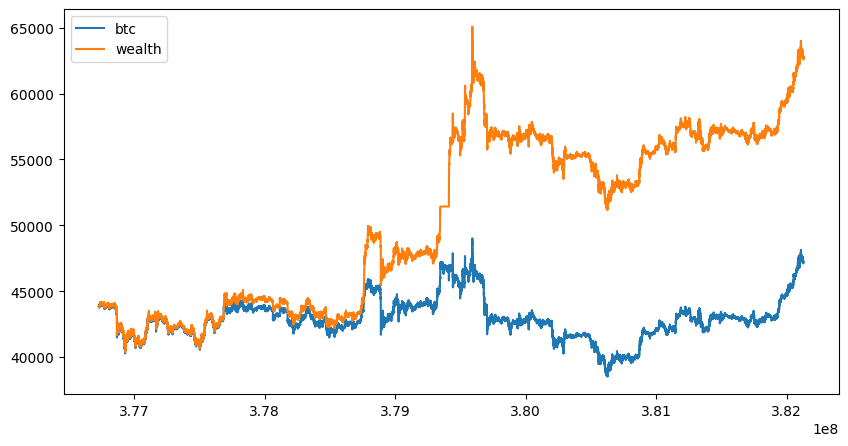

In [368]:
plt.figure(figsize=(10,5))
plt.plot(data_sub["Timestamp"], data_sub["Open"], label="btc")
plt.plot(times,wealths, label="wealth")
plt.legend()

<hr>

# Trading strategy 2
Added protection

In [369]:
money = 0.0
coins = 1.0

alpha_up = 0.001
alpha_low = 0.00001
alpha_low_safety = 0.01

last_deal_price = data_sub["Open"].iloc[0]
wealth = coins*last_deal_price
times = []
wealths = []
print(f"Time range: {((data_sub["Timestamp"].iloc[-1]-data_sub["Timestamp"].iloc[0])/(24*3600)):.2f} days")

for index, row in data_sub.iterrows():
    if row["High"] >= (1+alpha_up) * last_deal_price and coins != 0.0:
        # sell
        last_deal_price = row["High"]
        money = coins*last_deal_price
        wealth = money
        #print(f"{coins} coins sold for {last_deal_price}. Money: $ {money}")
        coins = 0.0
    elif row["Low"] <= (1-alpha_low) * last_deal_price and money != 0.0:
        # buy
        last_deal_price = row["Low"]
        coins = money/last_deal_price
        #print(f"{coins} coins bought for {last_deal_price}")
        wealth = money
        money = 0.0
    elif row["High"] <= (1-alpha_low_safety) * last_deal_price and coins != 0.0:
        # sell
        last_deal_price = row["High"]
        money = coins*last_deal_price
        wealth = money
        #ßprint(f"{coins} coins sold for {last_deal_price}. Money: $ {money}")
        coins = 0.0
    times.append(row["Timestamp"])
    wealth = money + coins*row["High"]
    wealths.append(wealth)
    #print(f"Money: {money} | Coins: {coins}")
    #print(row["Open"])
    #print(f"Change: {row["High"]/last_deal_price *100-100}%")
print(f"Initial market value: ${data_sub["Open"].iloc[0]:.2f}")
print(f"Final market value: ${data_sub["Open"].iloc[-1]:.2f}")
print(f"Final wealth: ${wealth:.2f}")
print(f"Beat the market by {(wealth/data_sub["Open"].iloc[-1]*100-100):.2f}%")
print(f"Coins owened: {coins:.2f}")

Time range: 62.50 days
Initial market value: $43844.00
Final market value: $47156.00
Final wealth: $450333.45
Beat the market by 854.99%
Coins owened: 0.00


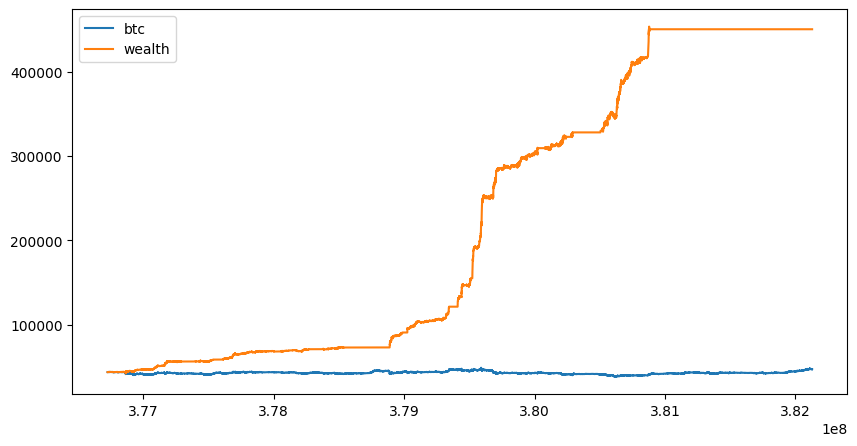

In [370]:
plt.figure(figsize=(10,5))
plt.plot(data_sub["Timestamp"], data_sub["Open"], label="btc")
plt.plot(times,wealths, label="wealth")
plt.legend()

## Taxed model...

In [371]:
money = 0.0
coins = 1.0

alpha_up = 0.01
alpha_low = 0.01
alpha_low_safety = 0.04

last_deal_price = data_sub["Open"].iloc[0]
wealth = coins*last_deal_price
times = []
wealths = []
print(f"Time range: {((data_sub["Timestamp"].iloc[-1]-data_sub["Timestamp"].iloc[0])/(24*3600)):.2f} days")

for index, row in data_sub.iterrows():
    if row["High"] >= (1+alpha_up) * last_deal_price and coins != 0.0:
        # sell
        last_deal_price = row["High"]
        money = 0.995*coins*last_deal_price
        wealth = money
        #print(f"{coins} coins sold for {last_deal_price}. Money: $ {money}")
        coins = 0.0
    elif row["Low"] <= (1-alpha_low) * last_deal_price and money != 0.0:
        # buy
        last_deal_price = row["Low"]
        coins = 0.995*money/last_deal_price
        #print(f"{coins} coins bought for {last_deal_price}")
        wealth = money
        money = 0.0
    elif row["High"] <= (1-alpha_low_safety) * last_deal_price and coins != 0.0:
        # sell
        last_deal_price = row["High"]
        money = 0.995*coins*last_deal_price
        wealth = money
        #ßprint(f"{coins} coins sold for {last_deal_price}. Money: $ {money}")
        coins = 0.0
    times.append(row["Timestamp"])
    wealth = money + coins*row["High"]
    wealths.append(wealth)
    #print(f"Money: {money} | Coins: {coins}")
    #print(row["Open"])
    #print(f"Change: {row["High"]/last_deal_price *100-100}%")
print(f"Initial market value: ${data_sub["Open"].iloc[0]:.2f}")
print(f"Final market value: ${data_sub["Open"].iloc[-1]:.2f}")
print(f"Final wealth: ${wealth:.2f}")
print(f"Beat the market by {(wealth/data_sub["Open"].iloc[-1]*100-100):.2f}%")
print(f"Coins owened: {coins:.2f}")

Time range: 62.50 days
Initial market value: $43844.00
Final market value: $47156.00
Final wealth: $39343.97
Beat the market by -16.57%
Coins owened: 0.00


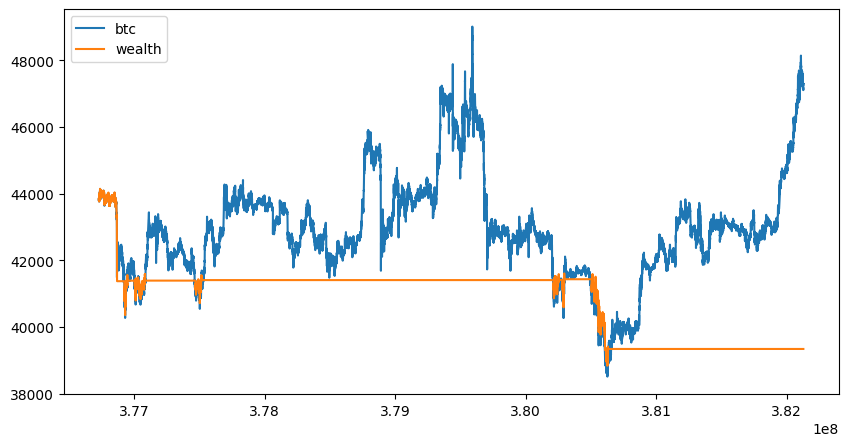

In [372]:
plt.figure(figsize=(10,5))
plt.plot(data_sub["Timestamp"], data_sub["Open"], label="btc")
plt.plot(times,wealths, label="wealth")
plt.legend()

## Lower frequency model - more reasonable

In [373]:
money = 0.0
coins = 1.0

alpha_up = 0.01
alpha_low = 0.01
alpha_low_safety = 0.02
alpha_high_catchup = 0.02

last_deal_price = data_sub["Open"].iloc[0]
wealth = coins*last_deal_price
times = []
wealths = []
print(f"Time range: {((data_sub["Timestamp"].iloc[-1]-data_sub["Timestamp"].iloc[0])/(24*3600)):.2f} days")

for index, row in data_sub.iterrows():
    if row["High"] >= (1+alpha_up) * last_deal_price and coins != 0.0:
        # sell
        last_deal_price = row["High"]
        money = coins*last_deal_price
        wealth = money
        #print(f"{coins} coins sold for {last_deal_price}. Money: $ {money}")
        coins = 0.0
    elif row["Low"] <= (1-alpha_low) * last_deal_price and money != 0.0:
        # buy
        last_deal_price = row["Low"]
        coins = money/last_deal_price
        #print(f"{coins} coins bought for {last_deal_price}")
        wealth = money
        money = 0.0
    elif row["Low"] <= (1-alpha_low_safety) * last_deal_price and coins != 0.0:
        # sell
        last_deal_price = row["High"]
        money = coins*last_deal_price
        wealth = money
        #ßprint(f"{coins} coins sold for {last_deal_price}. Money: $ {money}")
        coins = 0.0
    elif row["High"] >= (1+alpha_high_catchup) * last_deal_price and money != 0.0:
        # buy
        last_deal_price = row["Low"]
        coins = money/last_deal_price
        #print(f"{coins} coins bought for {last_deal_price}")
        wealth = money
        money = 0.0
    times.append(row["Timestamp"])
    wealth = money + coins*row["High"]
    wealths.append(wealth)
    #print(f"Money: {money} | Coins: {coins}")
    #print(row["Open"])
    #print(f"Change: {row["High"]/last_deal_price *100-100}%")
print(f"Initial market value: ${data_sub["Open"].iloc[0]:.2f}")
print(f"Final market value: ${data_sub["Open"].iloc[-1]:.2f}")
print(f"Final wealth: ${wealth:.2f}")
print(f"Beat the market by {(wealth/data_sub["Open"].iloc[-1]*100-100):.2f}%")
print(f"Coins owened: {coins:.2f}")

Time range: 62.50 days
Initial market value: $43844.00
Final market value: $47156.00
Final wealth: $56323.31
Beat the market by 19.44%
Coins owened: 1.19


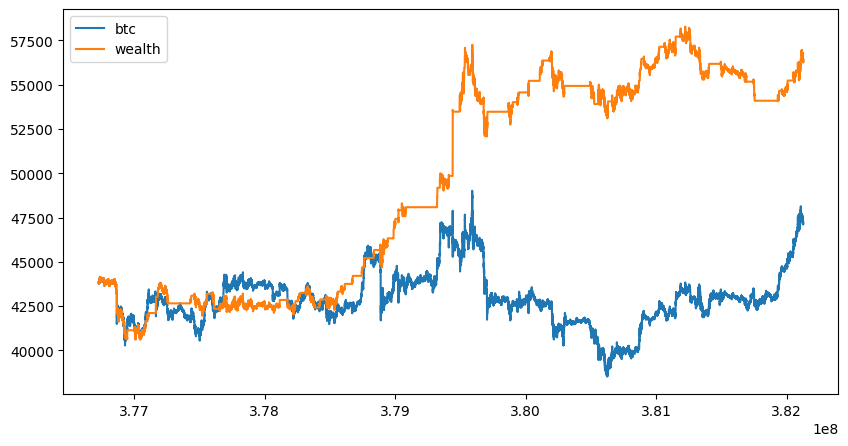

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data_sub["Timestamp"], data_sub["Open"], label="btc")
plt.plot(times,wealths, label="wealth")
plt.legend()
plt.title("Buying and selling ")